In [19]:
#1
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("ZIONO_weekly_return_volatility.csv")
df.label = df.label.fillna(method='ffill')
df_21 = df[df.Year==2021]
df_22 = df[df.Year==2022]

df_22.head(10)


df_21.head() # mean
df_21.iloc[:, 4:].head() # y

,label
2,green
3,red
4,green
5,red
6,green


k = 3, accuracy = 0.75
k = 5, accuracy = 0.75
k = 7, accuracy = 0.75
k = 9, accuracy = 0.625
k = 11, accuracy = 0.6875


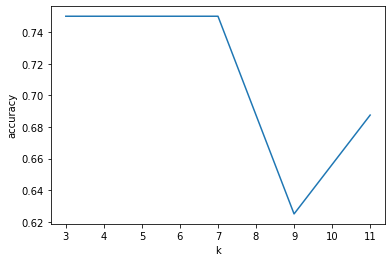

In [84]:



# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_21.iloc[:, 2:3], df_21.iloc[:, 4], test_size=0.3, random_state=434343)

# Define range of k values to try
k_values = [3, 5, 7, 9, 11]

# Train and evaluate k-NN classifier for each k
accuracies = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'k = {k}, accuracy = {acc}')

# Plot results
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [86]:
#2

# Predict labels for year 2
y2_pred = clf.predict( df_22.iloc[:, 2:3])
y2_true = df_22.iloc[:, 4]
# Compute accuracy
acc2 = accuracy_score(y2_true, y2_pred)
print(f'Accuracy for year 2: {acc2}')

Accuracy for year 2: 0.8076923076923077


In [87]:
#3
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y2_true, y2_pred)

# Print confusion matrix
print(cm)

[[18  9]
 [ 1 24]]


In [92]:
df_test = df_22
df_test['predict_label'] = y2_pred

#4
# Compute true positives (TP), false positives (FP),
# true negatives (TN), and false negatives (FN)
def TP(x):
  return 1 if x['predict_label']=='red' and x['label']=='red'  else 0
def FP(x):
  return 1 if x['predict_label']=='red' and x['label']=='green'  else 0
def TN(x):
  return 1 if x['predict_label']=='green' and x['label']=='green'  else 0
def FN(x):
  return 1 if x['predict_label']=='green' and x['label']=='red'  else 0

df_test['TP'] = df_test[df_test.columns].apply(lambda x: TP(x), axis=1)
df_test['FP'] = df_test[df_test.columns].apply(lambda x: FP(x), axis=1)
df_test['TN'] = df_test[df_test.columns].apply(lambda x: TN(x), axis=1)
df_test['FN'] = df_test[df_test.columns].apply(lambda x: FN(x), axis=1)
df_test.head()


<ipython-input-92-56a4df7f12aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_label'] = y2_pred
<ipython-input-92-56a4df7f12aa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['TP'] = df_test[df_test.columns].apply(lambda x: TP(x), axis=1)
<ipython-input-92-56a4df7f12aa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Year,Week_Number,mean_return,volatility,label,predict_label,TP,TN,FP,FN
54,2022,1,-0.2012,0.842329,red,red,1,0,0,0
55,2022,2,0.1002,0.604448,green,red,0,0,1,0
56,2022,3,0.1525,0.591757,green,green,0,1,0,0
57,2022,4,-0.3576,1.847664,red,red,1,0,0,0
58,2022,5,-0.1206,0.762250,red,red,1,0,0,0


In [94]:

tp_count = df_test.TP.sum()#算tp次数
fn_count = df_test.FN.sum()
tn_count = df_test.TN.sum()
fp_count = df_test.FP.sum()
total_count = df_test.shape[0]

tp_ratio = tp_count/(tp_count+fn_count)
tn_ratio = tn_count/(tn_count + fp_count)

[tp_ratio,  tn_ratio]

[0.96, 0.6666666666666666]